<a href="https://colab.research.google.com/github/castleeun/Time_series_data/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C2_%EC%95%A0%ED%94%8C%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)

In [ ]:
import pandas as pd

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/luen0205/timeSeriesData/refs/heads/main/apple_stock_data.csv'
apple_stock_data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
apple_stock_data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1692,2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
1693,2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
1694,2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700
1695,2024-09-27,228.460007,229.520004,227.300003,227.789993,227.789993,34026000
1696,2024-09-30,230.039993,233.000000,229.649994,233.000000,233.000000,54541900


<Figure size 1200x800 with 0 Axes>

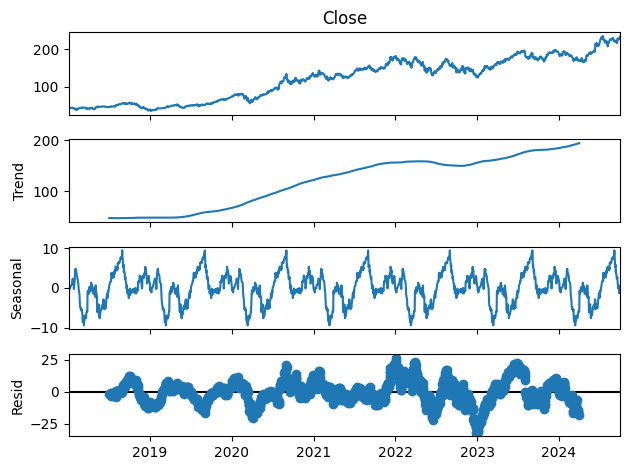

In [ ]:
AAPL_DT = 'https://raw.githubusercontent.com/luen0205/timeSeriesData/refs/heads/main/apple_stock_data.csv'

df_aapl = pd.read_csv(AAPL_DT)
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl.set_index('Date', inplace = True)

df_aapl = df_aapl.dropna()

# print(df_aapl['Close'].isnull().sum()) (결측값 확인)

aapl_addi = seasonal_decompose(df_aapl['Close'], model = 'additive', period = 252)

plt.figure(figsize = (12, 8))
aapl_addi.plot()
plt.show()

In [ ]:
simple_exp = ExponentialSmoothing(df_aapl['Close'], trend = None, seasonal = None, use_boxcox=True)
simple_exp_fit = simple_exp.fit(smoothing_level = 0.2, optimized = False)
df_aapl['Simple Exp Smoothing'] = simple_exp_fit.fittedvalues


holt = ExponentialSmoothing(df_aapl['Close'], trend = 'add', seasonal = None)
holt_fit = holt.fit(smoothing_level = 0.2, smoothing_trend = 0.2, optimized = False)
df_aapl['Holt Linear Smoothing'] = holt_fit.fittedvalues


holt_winters = ExponentialSmoothing(df_aapl['Close'], trend = 'add', seasonal = 'add', seasonal_periods = 12)
holt_winters_fit = holt_winters.fit(smoothing_level = 0.09, smoothing_trend = 0.08, smoothing_seasonal = 0.08, optimized = False)
df_aapl['Holt-Winters Smoothing'] = holt_winters_fit.fittedvalues

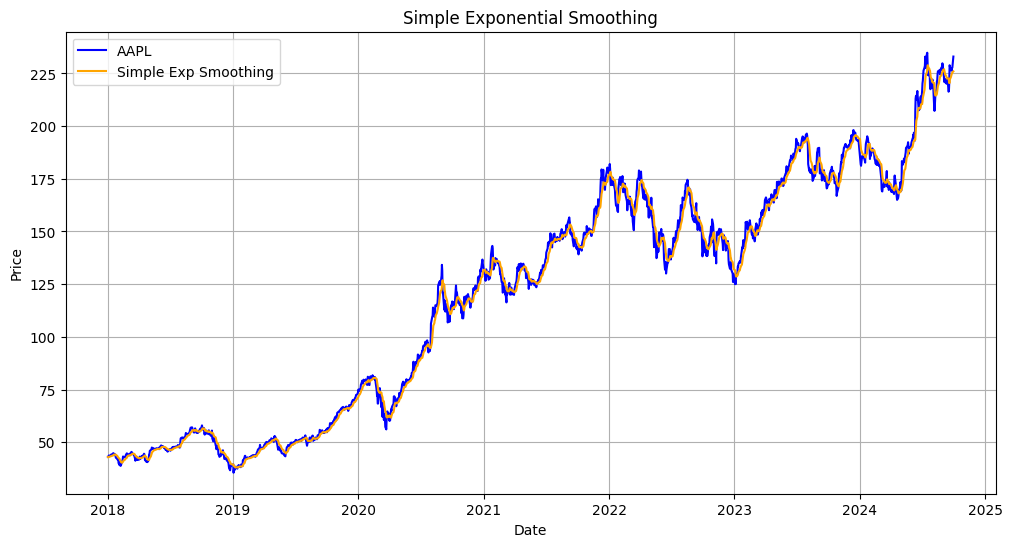

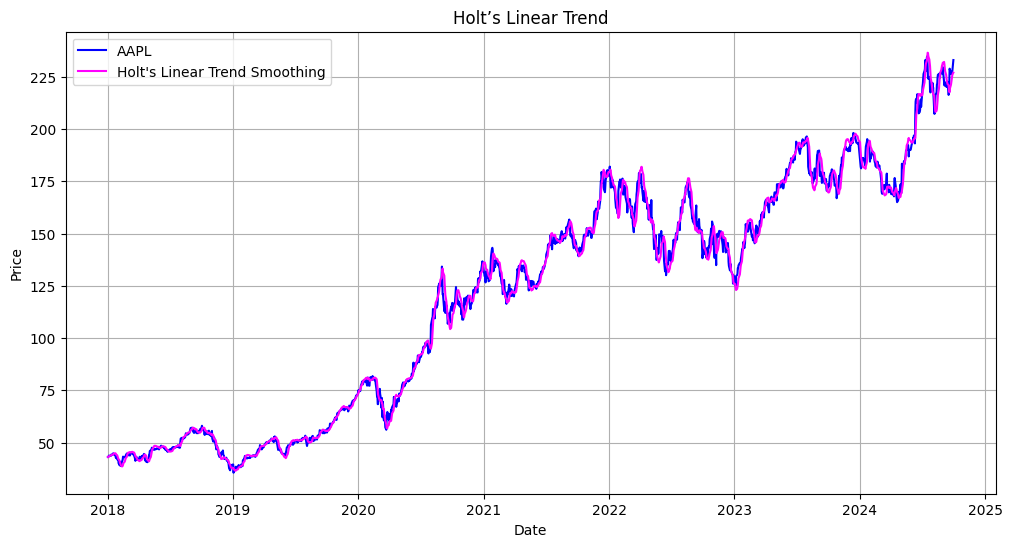

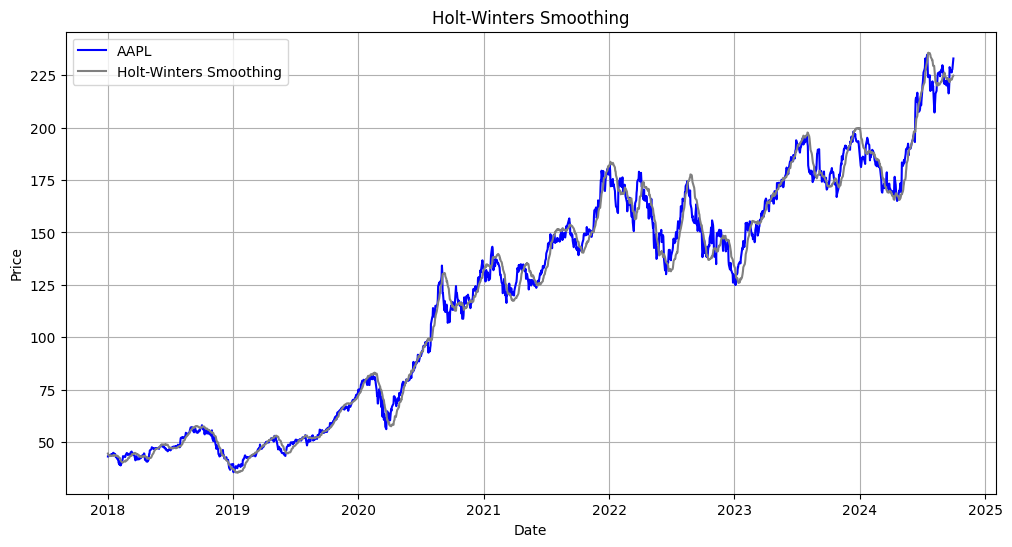

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_aapl['Close'], label = 'AAPL', color = 'blue')
plt.plot(df_aapl['Simple Exp Smoothing'], label='Simple Exp Smoothing', color='orange')
plt.legend()
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_aapl['Close'], label = 'AAPL', color = 'blue')
plt.plot(df_aapl['Holt Linear Smoothing'], label = "Holt's Linear Trend Smoothing", color = 'magenta')
plt.legend()
plt.title('Holt’s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_aapl['Close'], label = 'AAPL', color = 'blue')
plt.plot(df_aapl['Holt-Winters Smoothing'], label = 'Holt-Winters Smoothing', color = 'gray')
plt.legend()
plt.title('Holt-Winters Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
metrics = {}

for method in ['Simple Exp Smoothing', 'Holt Linear Smoothing', 'Holt-Winters Smoothing']:
    metrics[method] = {
        'MAE': mean_absolute_error(df_aapl['Close'], df_aapl[method]),
        'MSE': mean_squared_error(df_aapl['Close'], df_aapl[method]),
        'RMSE': np.sqrt(mean_squared_error(df_aapl['Close'], df_aapl[method]))
    }

for method, values in metrics.items():
    print(f"{method}: MAE = {values['MAE']:.2f}, MSE = {values['MSE']:.2f}, RMSE = {values['RMSE']:.2f}")

Simple Exp Smoothing: MAE = 2.79, MSE = 14.10, RMSE = 3.76
Holt Linear Smoothing: MAE = 2.63, MSE = 14.08, RMSE = 3.75
Holt-Winters Smoothing: MAE = 3.87, MSE = 28.58, RMSE = 5.35


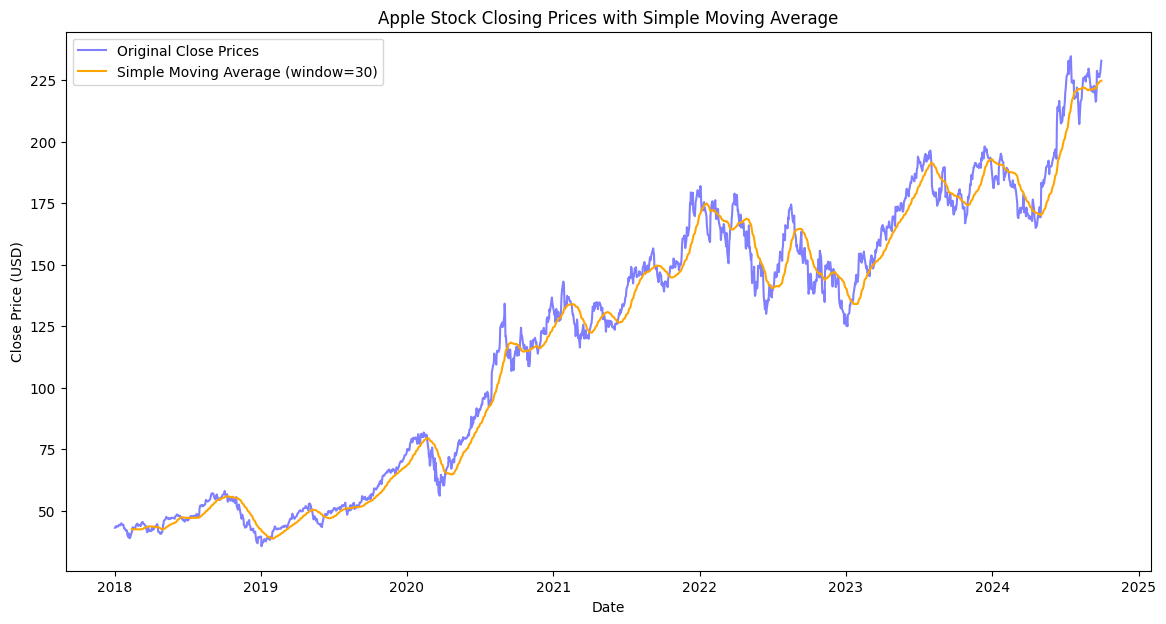

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 애플 주식 데이터 로드
url = 'https://raw.githubusercontent.com/luen0205/timeSeriesData/refs/heads/main/apple_stock_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 'Close' 가격 데이터 선택
close_prices = data['Close'].dropna()

# 단순 이동 평균 함수 정의
def simple_moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

# 이동 평균 계산 (예: 30일 이동 평균)
window_size = 30
sma = simple_moving_average(close_prices, window_size)

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Original Close Prices', color='blue', alpha=0.5)
plt.plot(sma, label=f'Simple Moving Average (window={window_size})', color='orange')
plt.title('Apple Stock Closing Prices with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


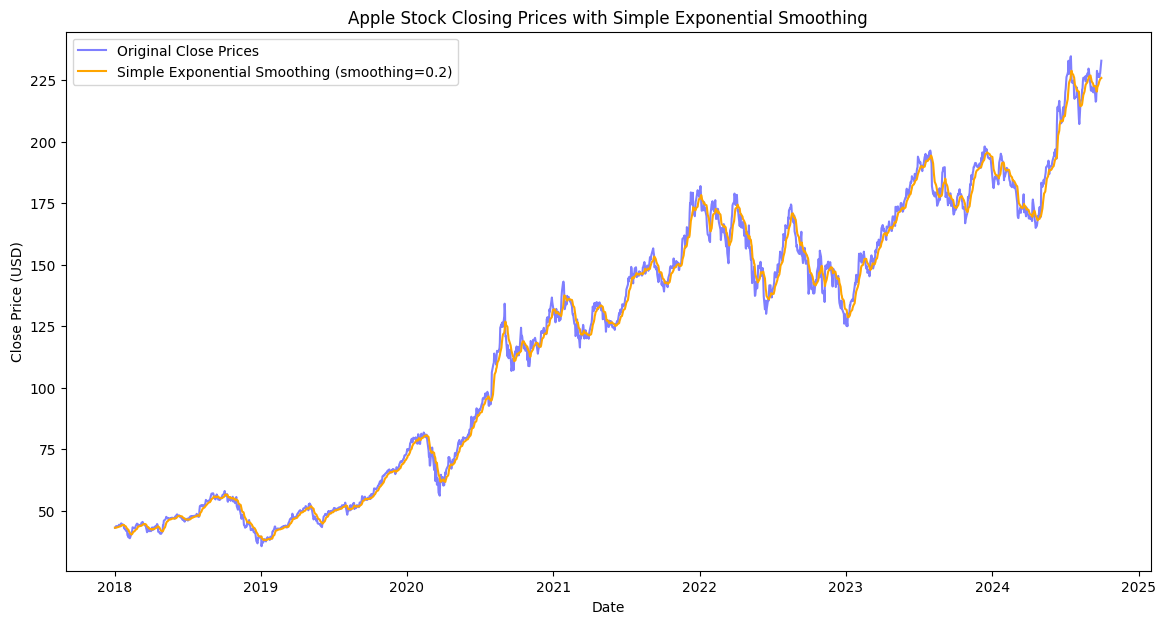

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 애플 주식 데이터 로드
url = 'https://raw.githubusercontent.com/luen0205/timeSeriesData/refs/heads/main/apple_stock_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 'Close' 가격 데이터 선택 후 결측값 제거
close_prices = data['Close'].dropna()

# 단순 지수 평활법 모델 적용
smoothing_level = 0.2  # 평활 수준 (0과 1 사이의 값)
model = SimpleExpSmoothing(close_prices)
model_fit = model.fit(smoothing_level=smoothing_level, optimized=False)

# 예측 수행 (가장 최근 데이터의 평활된 값)
fitted_values = model_fit.fittedvalues

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Original Close Prices', color='blue', alpha=0.5)
plt.plot(fitted_values, label=f'Simple Exponential Smoothing (smoothing={smoothing_level})', color='orange')
plt.title('Apple Stock Closing Prices with Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


<ipython-input-8-49f753e057d3>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(methods, rotation=45)
<ipython-input-8-49f753e057d3>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(methods, rotation=45)
<ipython-input-8-49f753e057d3>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(methods, rotation=45)


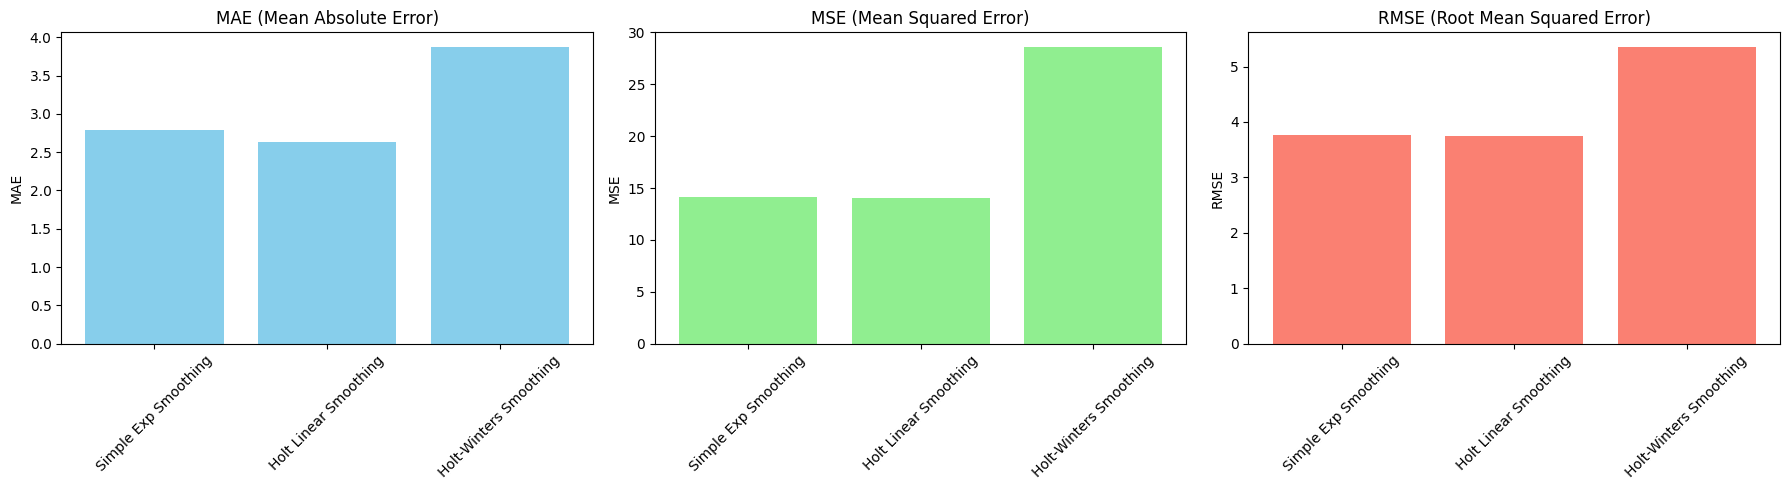

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 성능 지표 데이터
metrics = {
    'Simple Exp Smoothing': {'MAE': 2.79, 'MSE': 14.10, 'RMSE': 3.76},
    'Holt Linear Smoothing': {'MAE': 2.63, 'MSE': 14.08, 'RMSE': 3.75},
    'Holt-Winters Smoothing': {'MAE': 3.87, 'MSE': 28.58, 'RMSE': 5.35}
}

# 각 지표별로 데이터를 분리
methods = list(metrics.keys())
mae_values = [metrics[method]['MAE'] for method in methods]
mse_values = [metrics[method]['MSE'] for method in methods]
rmse_values = [metrics[method]['RMSE'] for method in methods]

# 그래프 그리기
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# MAE
axs[0].bar(methods, mae_values, color='skyblue')
axs[0].set_title('MAE (Mean Absolute Error)')
axs[0].set_ylabel('MAE')
axs[0].set_xticklabels(methods, rotation=45)

# MSE
axs[1].bar(methods, mse_values, color='lightgreen')
axs[1].set_title('MSE (Mean Squared Error)')
axs[1].set_ylabel('MSE')
axs[1].set_xticklabels(methods, rotation=45)

# RMSE
axs[2].bar(methods, rmse_values, color='salmon')
axs[2].set_title('RMSE (Root Mean Squared Error)')
axs[2].set_ylabel('RMSE')
axs[2].set_xticklabels(methods, rotation=45)

plt.tight_layout()
plt.show()
